In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import scipy.stats as stats
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima.model import ARIMA

In [ ]:
# Load dataset
file_path = "/content/drive/MyDrive/data set pbl 2.csv"
df = pd.read_csv(file_path)

In [ ]:
# Step 1: Strip whitespace from column names
df.columns = df.columns.str.replace('\xa0', '', regex=True).str.strip()
print("After Stripping Column Names:")
print(df.columns, "\n")

After Stripping Column Names:
Index(['open', 'high', 'low', 'close', 'volume'], dtype='object') 



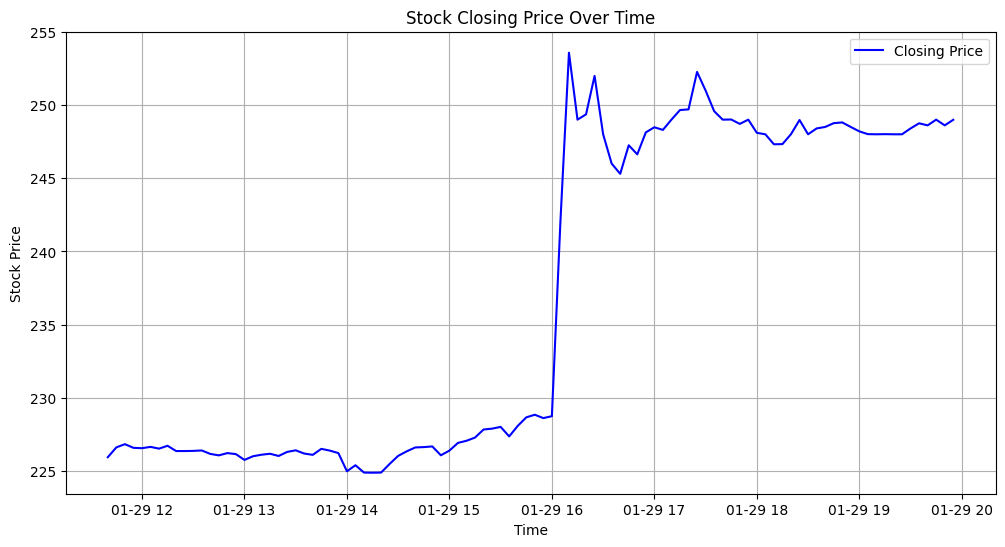

In [ ]:
# 1. Plot Closing Price
def plot_closing_price():
    plt.figure(figsize=(12,6))
    plt.plot(df['close'], label='Closing Price', color='blue')
    plt.xlabel('Time')
    plt.ylabel('Stock Price')
    plt.title('Stock Closing Price Over Time')
    plt.legend()
    plt.grid()
    plt.show()

plot_closing_price()


In [ ]:
plt.plot(df['Date'], df['Vol.'], color='orange', label='Volume')
plt.title("Traded Volume Over Time")
plt.xlabel("Date")
plt.ylabel("Volume")
plt.legend()
plt.show()


KeyError: 'Date'

In [ ]:
# 2. ADF Test for Stationarity
adf_result = adfuller(df['close'])
print(f"ADF Statistic: {adf_result[0]}")
print(f"p-value: {adf_result[1]}")
print("Critical Values:")
for key, value in adf_result[4].items():
    print(f"   {key}: {value}")


ADF Statistic: -0.8355985353521987
p-value: 0.8084410192566021
Critical Values:
   1%: -3.5011373281819504
   5%: -2.8924800524857854
   10%: -2.5832749307479226


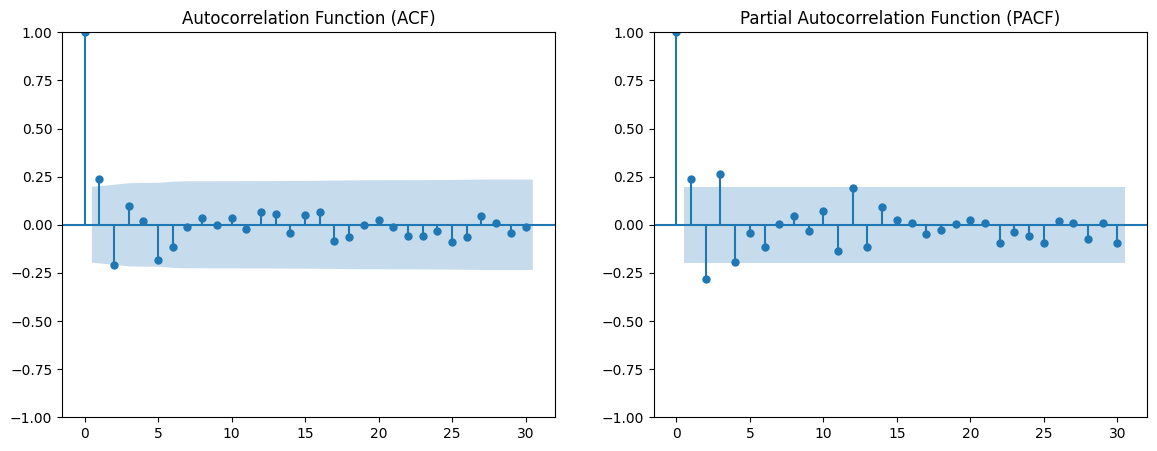

In [ ]:
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# 3. Plot ACF & PACF
def plot_acf_pacf():
    fig, axes = plt.subplots(1, 2, figsize=(14, 5))

    plot_acf(df['close'].diff().dropna(), ax=axes[0], lags=30)
    axes[0].set_title('Autocorrelation Function (ACF)')

    plot_pacf(df['close'].diff().dropna(), ax=axes[1], lags=30, method='ywm')
    axes[1].set_title('Partial Autocorrelation Function (PACF)')

    plt.show()

plot_acf_pacf()


In [ ]:
# 4. Fit ARIMA Model
model = ARIMA(df['close'], order=(1,1,1))
model_fit = model.fit()
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:                  close   No. Observations:                  100
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -198.165
Date:                Thu, 03 Apr 2025   AIC                            402.331
Time:                        15:12:12   BIC                            410.116
Sample:                    01-29-2025   HQIC                           405.481
                         - 01-29-2025                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.2510      0.096     -2.601      0.009      -0.440      -0.062
ma.L1          0.7064      0.104      6.802      0.000       0.503       0.910
sigma2         3.1956      0.138     23.155      0.0

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency 5min will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency 5min will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency 5min will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


In [ ]:
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:                  close   No. Observations:                  100
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -198.165
Date:                Thu, 03 Apr 2025   AIC                            402.331
Time:                        15:12:14   BIC                            410.116
Sample:                    01-29-2025   HQIC                           405.481
                         - 01-29-2025                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.2510      0.096     -2.601      0.009      -0.440      -0.062
ma.L1          0.7064      0.104      6.802      0.000       0.503       0.910
sigma2         3.1956      0.138     23.155      0.0

In [ ]:
df = df.asfreq('5min')  # Assuming data is recorded every 5 minutes
df = df.ffill()  # Fill missing values, if any


In [ ]:
from statsmodels.tsa.arima.model import ARIMA

model = ARIMA(df['close'], order=(1,1,0))  # Remove MA component (0 instead of 1)
model_fit = model.fit()
print(model_fit.summary())


                               SARIMAX Results                                
Dep. Variable:                  close   No. Observations:                  100
Model:                 ARIMA(1, 1, 0)   Log Likelihood                -204.907
Date:                Thu, 03 Apr 2025   AIC                            413.813
Time:                        15:12:17   BIC                            419.003
Sample:                    01-29-2025   HQIC                           415.913
                         - 01-29-2025                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.2466      0.026      9.352      0.000       0.195       0.298
sigma2         3.6730      0.140     26.324      0.000       3.400       3.946
Ljung-Box (L1) (Q):                   0.39   Jarque-

In [ ]:
print(df['close'].isnull().sum())  # Should be 0
print(df['close'].dtype)  # Should be float or int


0
float64


In [ ]:
print(df.index)  # Should show DatetimeIndex
print(df.index.dtype)  # Should be 'datetime64[ns]'


DatetimeIndex(['2025-01-29 11:40:00', '2025-01-29 11:45:00',
               '2025-01-29 11:50:00', '2025-01-29 11:55:00',
               '2025-01-29 12:00:00', '2025-01-29 12:05:00',
               '2025-01-29 12:10:00', '2025-01-29 12:15:00',
               '2025-01-29 12:20:00', '2025-01-29 12:25:00',
               '2025-01-29 12:30:00', '2025-01-29 12:35:00',
               '2025-01-29 12:40:00', '2025-01-29 12:45:00',
               '2025-01-29 12:50:00', '2025-01-29 12:55:00',
               '2025-01-29 13:00:00', '2025-01-29 13:05:00',
               '2025-01-29 13:10:00', '2025-01-29 13:15:00',
               '2025-01-29 13:20:00', '2025-01-29 13:25:00',
               '2025-01-29 13:30:00', '2025-01-29 13:35:00',
               '2025-01-29 13:40:00', '2025-01-29 13:45:00',
               '2025-01-29 13:50:00', '2025-01-29 13:55:00',
               '2025-01-29 14:00:00', '2025-01-29 14:05:00',
               '2025-01-29 14:10:00', '2025-01-29 14:15:00',
               '2025-01-

In [ ]:
from statsmodels.tsa.arima.model import ARIMA

model = ARIMA(df['close'], order=(1,1,0))  # No MA component
model_fit = model.fit()
print(model_fit.summary())


                               SARIMAX Results                                
Dep. Variable:                  close   No. Observations:                  100
Model:                 ARIMA(1, 1, 0)   Log Likelihood                -204.907
Date:                Thu, 03 Apr 2025   AIC                            413.813
Time:                        15:12:26   BIC                            419.003
Sample:                    01-29-2025   HQIC                           415.913
                         - 01-29-2025                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.2466      0.026      9.352      0.000       0.195       0.298
sigma2         3.6730      0.140     26.324      0.000       3.400       3.946
Ljung-Box (L1) (Q):                   0.39   Jarque-

In [ ]:
forecast_steps = 10
forecast = model_fit.forecast(steps=forecast_steps)

future_dates = pd.date_range(start=df.index[-1], periods=forecast_steps, freq="5min")
forecast_df = pd.DataFrame(forecast, index=future_dates, columns=['Predicted Price'])

print(forecast_df.head())  # Check predictions


                    Predicted Price
2025-01-29 19:55:00             NaN
2025-01-29 20:00:00             NaN
2025-01-29 20:05:00             NaN
2025-01-29 20:10:00             NaN
2025-01-29 20:15:00             NaN


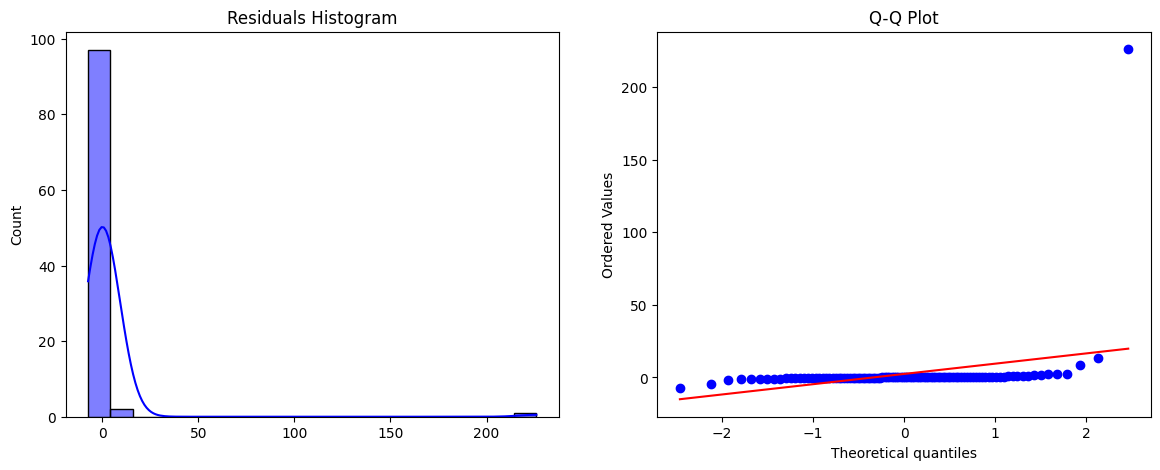

In [ ]:
# 5. Residual Analysis
def plot_residuals():
    residuals = model_fit.resid
    fig, axes = plt.subplots(1, 2, figsize=(14, 5))
    sns.histplot(residuals, bins=20, kde=True, ax=axes[0], color='blue')
    axes[0].set_title("Residuals Histogram")
    stats.probplot(residuals, dist="norm", plot=axes[1])
    axes[1].set_title("Q-Q Plot")
    plt.show()

plot_residuals()

<ipython-input-25-b20f64f9a4c3>:5: FutureWarning: 'T' is deprecated and will be removed in a future version, please use 'min' instead.
  future_dates = pd.date_range(start=df.index[-1], periods=forecast_steps + 1, freq="5T")[1:]


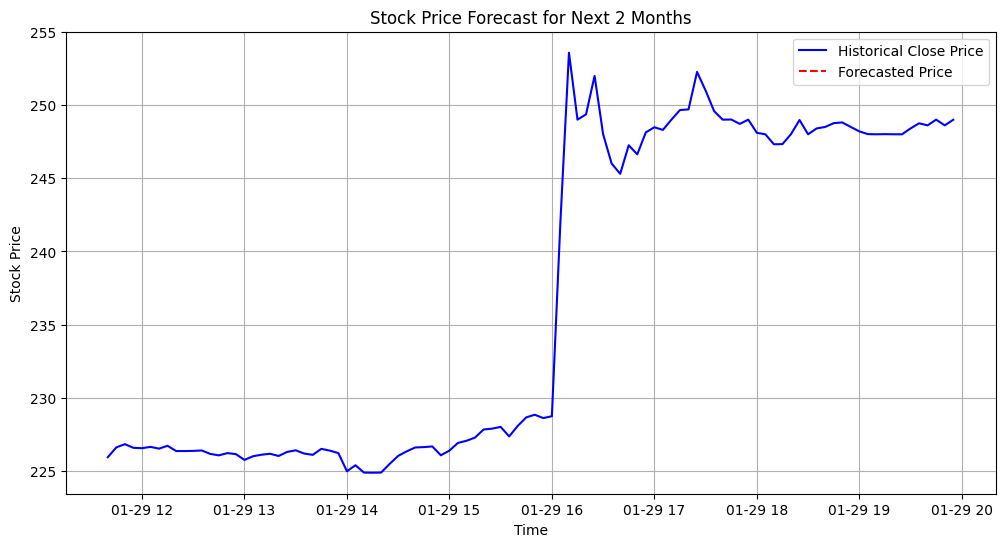

In [ ]:
# 6. Forecasting
def forecast_stock():
    forecast_steps = 60 * 24 * 60 // 5  # 2 months worth of 5-minute intervals
    forecast = model_fit.forecast(steps=forecast_steps)
    future_dates = pd.date_range(start=df.index[-1], periods=forecast_steps + 1, freq="5T")[1:]
    forecast_df = pd.DataFrame(forecast, index=future_dates, columns=['Forecast'])
    plt.figure(figsize=(12,6))
    plt.plot(df['close'], label='Historical Close Price', color='blue')
    plt.plot(forecast_df, label='Forecasted Price', color='red', linestyle='dashed')
    plt.xlabel('Time')
    plt.ylabel('Stock Price')
    plt.title('Stock Price Forecast for Next 2 Months')
    plt.legend()
    plt.grid()
    plt.show()

forecast_stock()

In [ ]:
print(model_fit.summary())


                               SARIMAX Results                                
Dep. Variable:                  close   No. Observations:                  100
Model:                 ARIMA(1, 1, 0)   Log Likelihood                -204.907
Date:                Thu, 03 Apr 2025   AIC                            413.813
Time:                        15:12:38   BIC                            419.003
Sample:                    01-29-2025   HQIC                           415.913
                         - 01-29-2025                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.2466      0.026      9.352      0.000       0.195       0.298
sigma2         3.6730      0.140     26.324      0.000       3.400       3.946
Ljung-Box (L1) (Q):                   0.39   Jarque-

<ipython-input-27-96a8a5822a02>:4: FutureWarning: 'T' is deprecated and will be removed in a future version, please use 'min' instead.
  future_dates = pd.date_range(start=df.index[-1], periods=steps + 1, freq="5T")[1:]


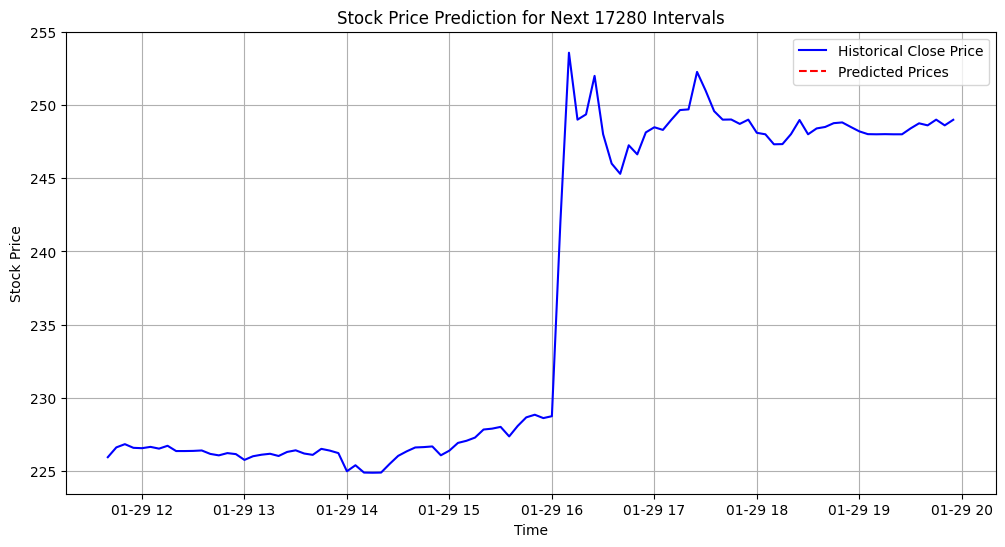

                    Predicted Price
2025-01-29 20:00:00             NaN
2025-01-29 20:05:00             NaN
2025-01-29 20:10:00             NaN
2025-01-29 20:15:00             NaN
2025-01-29 20:20:00             NaN


In [ ]:
# Forecasting Future Stock Prices
def predict_stock_prices(steps=60):  # Change steps for a longer forecast
    forecast = model_fit.forecast(steps=steps)  # Predict next 'steps' time intervals
    future_dates = pd.date_range(start=df.index[-1], periods=steps + 1, freq="5T")[1:]
    forecast_df = pd.DataFrame(forecast, index=future_dates, columns=['Predicted Price'])

    # Plot historical and predicted prices
    plt.figure(figsize=(12,6))
    plt.plot(df['close'], label='Historical Close Price', color='blue')
    plt.plot(forecast_df, label='Predicted Prices', color='red', linestyle='dashed')
    plt.xlabel('Time')
    plt.ylabel('Stock Price')
    plt.title(f'Stock Price Prediction for Next {steps} Intervals')
    plt.legend()
    plt.grid()
    plt.show()

    return forecast_df  # Return the predicted values

# Predict for the next 2 months (steps adjusted for 5-minute intervals)
predicted_prices = predict_stock_prices(steps=60 * 24 * 60 // 5)  # 2 months
print(predicted_prices.head())  # Show first few predictions


In [ ]:
print(model_fit.summary())


                               SARIMAX Results                                
Dep. Variable:                  close   No. Observations:                  100
Model:                 ARIMA(1, 1, 0)   Log Likelihood                -204.907
Date:                Thu, 03 Apr 2025   AIC                            413.813
Time:                        15:12:47   BIC                            419.003
Sample:                    01-29-2025   HQIC                           415.913
                         - 01-29-2025                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.2466      0.026      9.352      0.000       0.195       0.298
sigma2         3.6730      0.140     26.324      0.000       3.400       3.946
Ljung-Box (L1) (Q):                   0.39   Jarque-

In [ ]:
print(df['close'].dtype)
print(df['close'].isnull().sum())  # Check for missing values

float64
0


In [ ]:
from statsmodels.tsa.arima.model import ARIMA

# Fit the ARIMA model again
model = ARIMA(df['close'], order=(1,1,1))
model_fit = model.fit()

# Forecast future prices
forecast_steps = 60  # Predict next 60 time intervals
forecast = model_fit.forecast(steps=forecast_steps)

# Create a future datetime index
future_dates = pd.date_range(start=df.index[-1], periods=forecast_steps + 1, freq="5T")[1:]

# Convert forecast to DataFrame
forecast_df = pd.DataFrame(forecast, index=future_dates, columns=['Predicted Price'])

# Display first few predictions
print(forecast_df.head())


                    Predicted Price
2025-01-29 20:00:00             NaN
2025-01-29 20:05:00             NaN
2025-01-29 20:10:00             NaN
2025-01-29 20:15:00             NaN
2025-01-29 20:20:00             NaN


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
<ipython-input-30-3b167bc0f8e7>:12: FutureWarning: 'T' is deprecated and will be removed in a future version, please use 'min' instead.
  future_dates = pd.date_range(start=df.index[-1], periods=forecast_steps + 1, freq="5T")[1:]


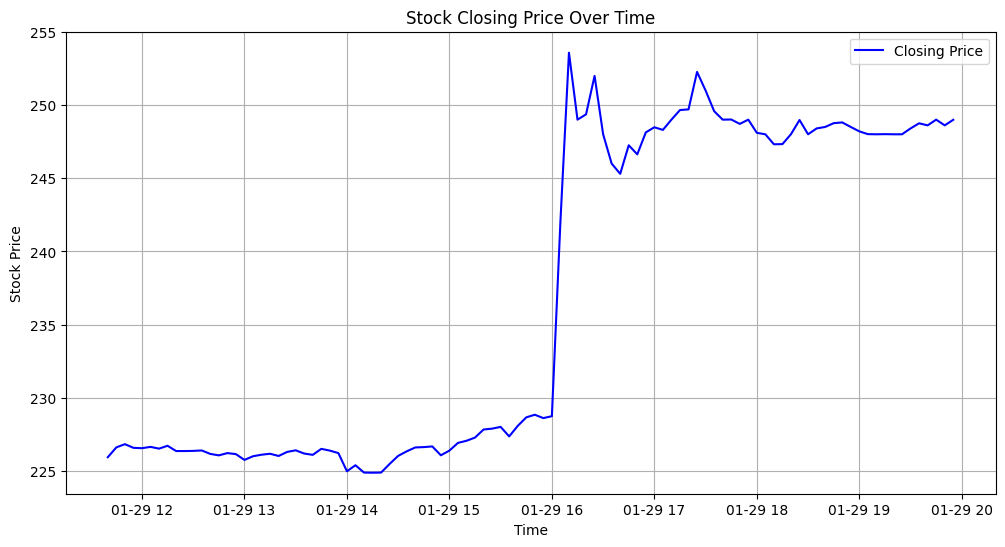

ADF Statistic: -0.8355985353521987
p-value: 0.8084410192566021
Critical Values:
   1%: -3.5011373281819504
   5%: -2.8924800524857854
   10%: -2.5832749307479226


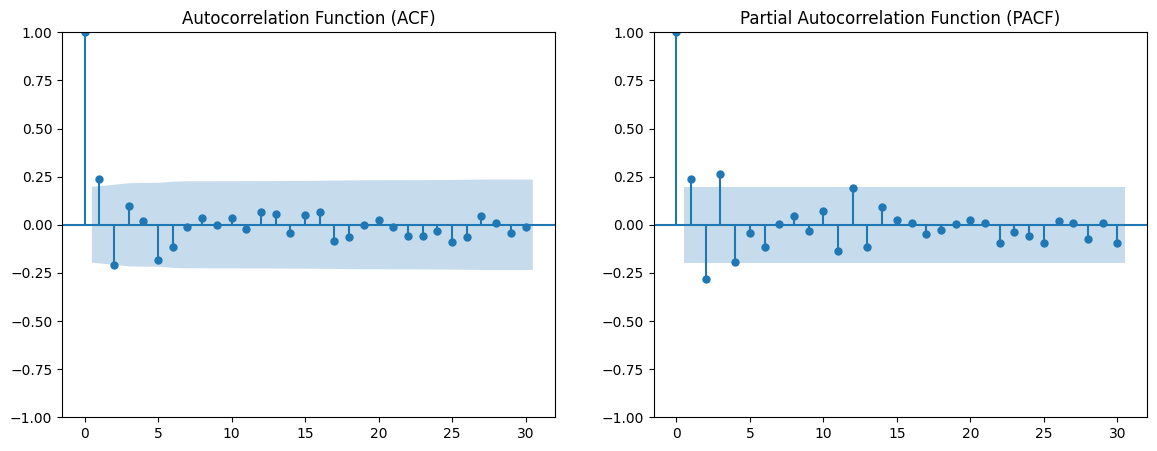

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


                               SARIMAX Results                                
Dep. Variable:                  close   No. Observations:                  100
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -198.165
Date:                Thu, 03 Apr 2025   AIC                            402.331
Time:                        15:12:56   BIC                            410.116
Sample:                    01-29-2025   HQIC                           405.481
                         - 01-29-2025                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.2510      0.096     -2.601      0.009      -0.440      -0.062
ma.L1          0.7064      0.104      6.802      0.000       0.503       0.910
sigma2         3.1956      0.138     23.155      0.0

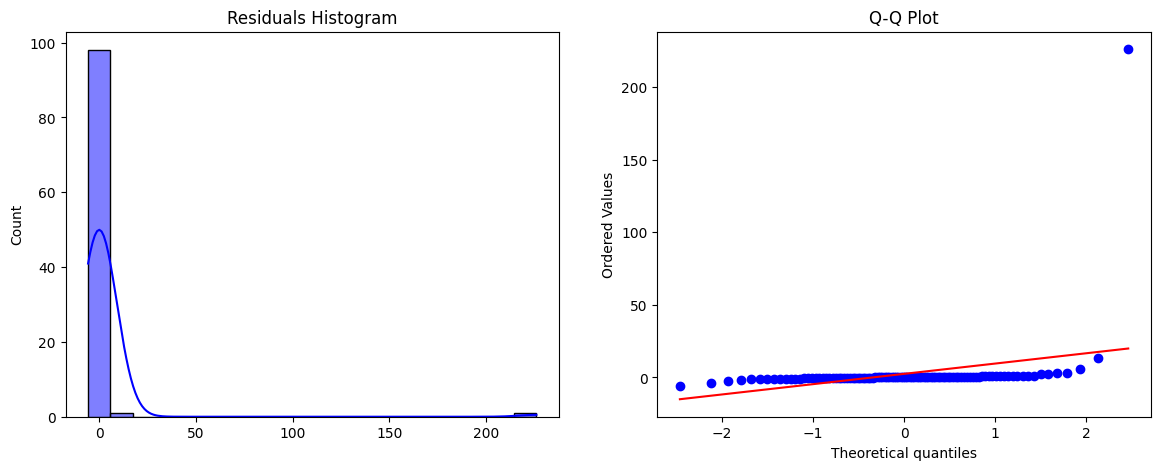

<ipython-input-31-fe8b2e5fe3b7>:54: FutureWarning: 'T' is deprecated and will be removed in a future version, please use 'min' instead.
  future_dates = pd.date_range(start=df.index[-1], periods=forecast_steps + 1, freq="5T")[1:]


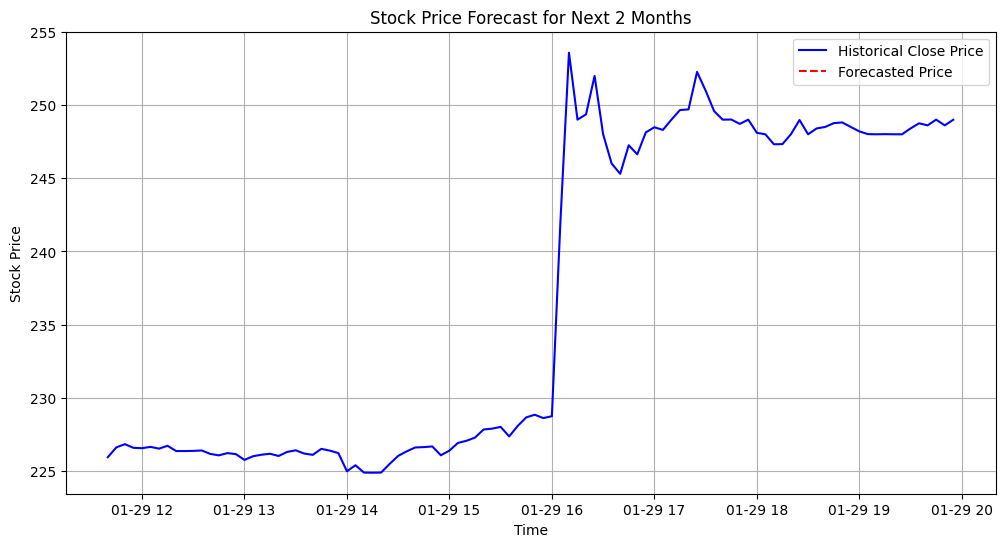

In [ ]:
# 1. Plot Closing Price
def plot_closing_price():
    plt.figure(figsize=(12,6))
    plt.plot(df['close'], label='Closing Price', color='blue')
    plt.xlabel('Time')
    plt.ylabel('Stock Price')
    plt.title('Stock Closing Price Over Time')
    plt.legend()
    plt.grid()
    plt.show()

plot_closing_price()

# 2. ADF Test for Stationarity
adf_result = adfuller(df['close'])
print(f"ADF Statistic: {adf_result[0]}")
print(f"p-value: {adf_result[1]}")
print("Critical Values:")
for key, value in adf_result[4].items():
    print(f"   {key}: {value}")

# 3. Plot ACF & PACF
def plot_acf_pacf():
    fig, axes = plt.subplots(1, 2, figsize=(14, 5))
    plot_acf(df['close'].diff().dropna(), ax=axes[0], lags=30)
    axes[0].set_title('Autocorrelation Function (ACF)')
    plot_pacf(df['close'].diff().dropna(), ax=axes[1], lags=30)
    axes[1].set_title('Partial Autocorrelation Function (PACF)')
    plt.show()

plot_acf_pacf()

# 4. Fit ARIMA Model
model = ARIMA(df['close'], order=(1,1,1))
model_fit = model.fit()
print(model_fit.summary())

# 5. Residual Analysis
def plot_residuals():
    residuals = model_fit.resid
    fig, axes = plt.subplots(1, 2, figsize=(14, 5))
    sns.histplot(residuals, bins=20, kde=True, ax=axes[0], color='blue')
    axes[0].set_title("Residuals Histogram")
    stats.probplot(residuals, dist="norm", plot=axes[1])
    axes[1].set_title("Q-Q Plot")
    plt.show()

plot_residuals()

# 6. Forecasting
def forecast_stock():
    forecast_steps = 60 * 24 * 60 // 5  # 2 months worth of 5-minute intervals
    forecast = model_fit.forecast(steps=forecast_steps)
    future_dates = pd.date_range(start=df.index[-1], periods=forecast_steps + 1, freq="5T")[1:]
    forecast_df = pd.DataFrame(forecast, index=future_dates, columns=['Forecast'])
    plt.figure(figsize=(12,6))
    plt.plot(df['close'], label='Historical Close Price', color='blue')
    plt.plot(forecast_df, label='Forecasted Price', color='red', linestyle='dashed')
    plt.xlabel('Time')
    plt.ylabel('Stock Price')
    plt.title('Stock Price Forecast for Next 2 Months')
    plt.legend()
    plt.grid()
    plt.show()

forecast_stock()


In [ ]:
# 3️⃣ Predict Future Prices (Next 2 Months)
forecast_steps = 60 * 24 * 60 // 5  # 2 months worth of 5-minute intervals
forecast = model_fit.forecast(steps=forecast_steps)

# Create future dates
future_dates = pd.date_range(start=df.index[-1], periods=forecast_steps + 1, freq="5T")[1:]

# Convert forecast to DataFrame
forecast_df = pd.DataFrame(forecast, index=future_dates, columns=['close'])

# 4️⃣ Merge Historical and Forecasted Data
df_extended = pd.concat([df, forecast_df])  # Append predictions


<ipython-input-43-18aee89515b9>:6: FutureWarning: 'T' is deprecated and will be removed in a future version, please use 'min' instead.
  future_dates = pd.date_range(start=df.index[-1], periods=forecast_steps + 1, freq="5T")[1:]
<ipython-input-43-18aee89515b9>:12: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df_extended = pd.concat([df, forecast_df])  # Append predictions


        Cumulative Return  Annualized Volatility  Sharpe Ratio  Max Drawdown
open             0.102150               0.326504      0.917026     -0.098355
high             0.102724               0.152187      1.709312     -0.049092
low              0.102330               0.425774      0.792037     -0.085179
close            0.101969               0.132313      1.932655     -0.032614
volume          -0.902810            1332.850117      2.128808     -0.999785


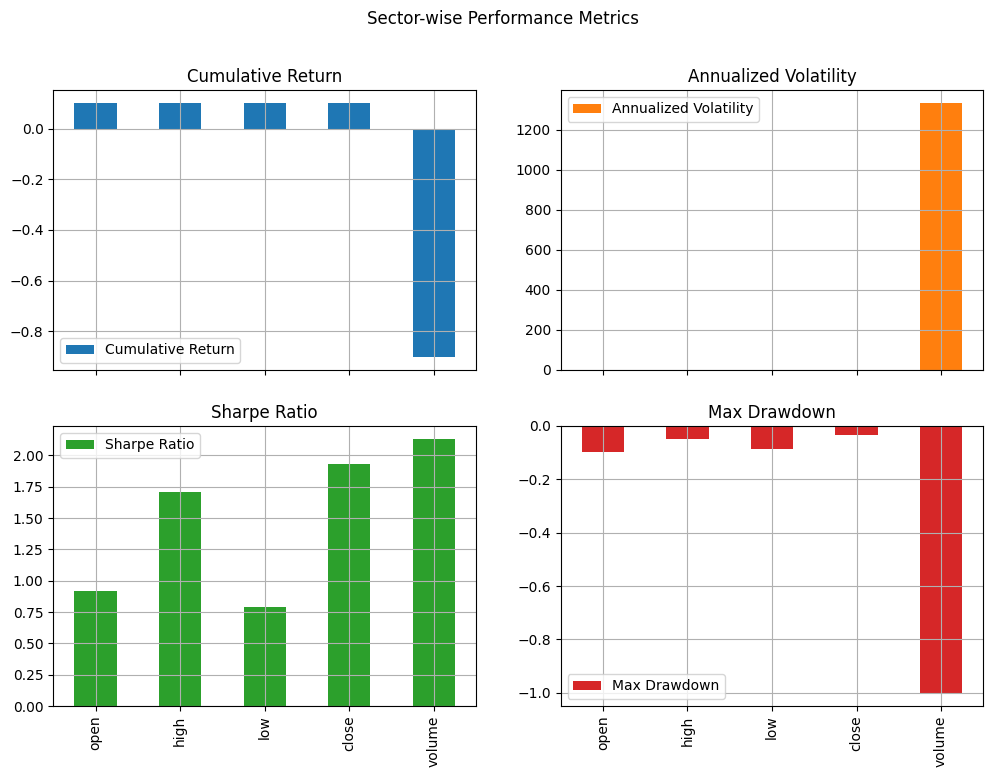

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Function to calculate performance metrics
def calculate_performance_metrics(df):
    performance_matrix = {}
    for sector in df.columns:
        sector_prices = df[sector]
        returns = sector_prices.pct_change().dropna()

        cumulative_return = (sector_prices.iloc[-1] / sector_prices.iloc[0]) - 1
        volatility = returns.std() * np.sqrt(252)  # Annualized volatility
        sharpe_ratio = returns.mean() / returns.std() * np.sqrt(252)  # Assuming risk-free rate = 0
        max_drawdown = ((sector_prices / sector_prices.cummax()) - 1).min()

        performance_matrix[sector] = {
            'Cumulative Return': cumulative_return,
            'Annualized Volatility': volatility,
            'Sharpe Ratio': sharpe_ratio,
            'Max Drawdown': max_drawdown
        }

    return pd.DataFrame(performance_matrix).T

# Example usage (assuming df contains different sector closing prices)
performance_df = calculate_performance_metrics(df)
print(performance_df)

# Plot Performance Metrics
def plot_performance_metrics(performance_df):
    performance_df.plot(kind='bar', subplots=True, layout=(2,2), figsize=(12,8), legend=True, grid=True)
    plt.suptitle("Sector-wise Performance Metrics")
    plt.show()

plot_performance_metrics(performance_df)


             Cumulative Return  Annualized Volatility  Sharpe Ratio  \
Performance           0.101969               0.132313      1.932655   

             Max Drawdown  
Performance     -0.032614  


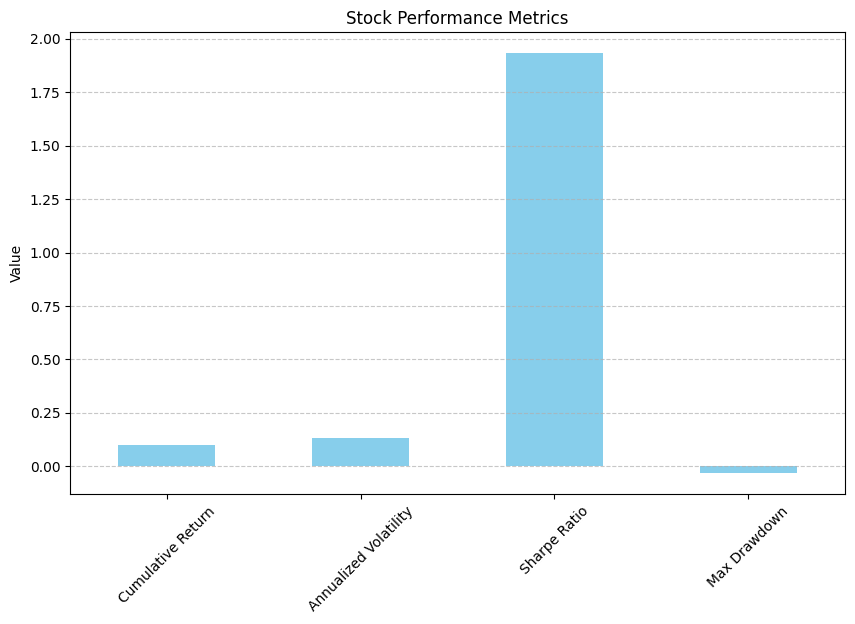

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Function to calculate performance metrics for a single stock
def calculate_stock_performance(df):
    stock_prices = df['close']  # Assuming 'close' is the column for stock prices
    returns = stock_prices.pct_change().dropna()

    cumulative_return = (stock_prices.iloc[-1] / stock_prices.iloc[0]) - 1
    volatility = returns.std() * np.sqrt(252)  # Annualized volatility (252 trading days)
    sharpe_ratio = returns.mean() / returns.std() * np.sqrt(252)  # Risk-free rate assumed 0
    max_drawdown = ((stock_prices / stock_prices.cummax()) - 1).min()

    performance_matrix = {
        'Cumulative Return': cumulative_return,
        'Annualized Volatility': volatility,
        'Sharpe Ratio': sharpe_ratio,
        'Max Drawdown': max_drawdown
    }

    return pd.DataFrame(performance_matrix, index=['Performance'])

# Calculate Performance Metrics
performance_df = calculate_stock_performance(df)
print(performance_df)

# Plot Performance Metrics
def plot_performance_metrics(performance_df):
    performance_df.T.plot(kind='bar', figsize=(10,6), color='skyblue', legend=False)
    plt.title("Stock Performance Metrics")
    plt.ylabel("Value")
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.xticks(rotation=45)
    plt.show()

plot_performance_metrics(performance_df)
